# Bayesian exercise with m&m's 
Before we get started, let's review some of the notation:

$\theta \rightarrow$ percentage of blue m&m's. This is the parameter we are trying to infer.

$n \rightarrow$ total number of m&m's in the bag

$y \rightarrow$ number of blue m&m's in the bag

## 1. Defining the prior distribution
As discussed, you are going to use the conjugate prior to the binomial distribution --- the beta distribution --- to quantify your prior information on the percentage $\theta$ of blue m&m's. Recall that the beta distribution has two parameters that define its shape, $\alpha$ and $\beta$, and that it has the form:
\begin{equation}
    p(\theta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1}
\end{equation}

To get a feel for how the values of the parameters $\alpha$ and $\beta$ "shape" the distribution, look at the example below.

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt

# makes the plot look prettier
# you can comment out these next two lines 
# without breaking anything below 
import seaborn as sns
sns.set_style("whitegrid")

# don't comment out these two lines, though
# we definitely need those two packages:
import numpy as np
import scipy.stats

Create a few sets of values for ($\alpha$, $\beta$):

In [2]:
# alpha and beta both equal to one
a1 = 1
b1 = 1

# alpha and beta are equal to each other but not equal to one
a2 = 5
b2 = 5

# alpha < beta 
a3 = 1
b3 = 5

# alpha > beta
a4 = 5
b4 = 1

Now plot the four different beta distributions that these parameter values create:

<IPython.core.display.Javascript object>


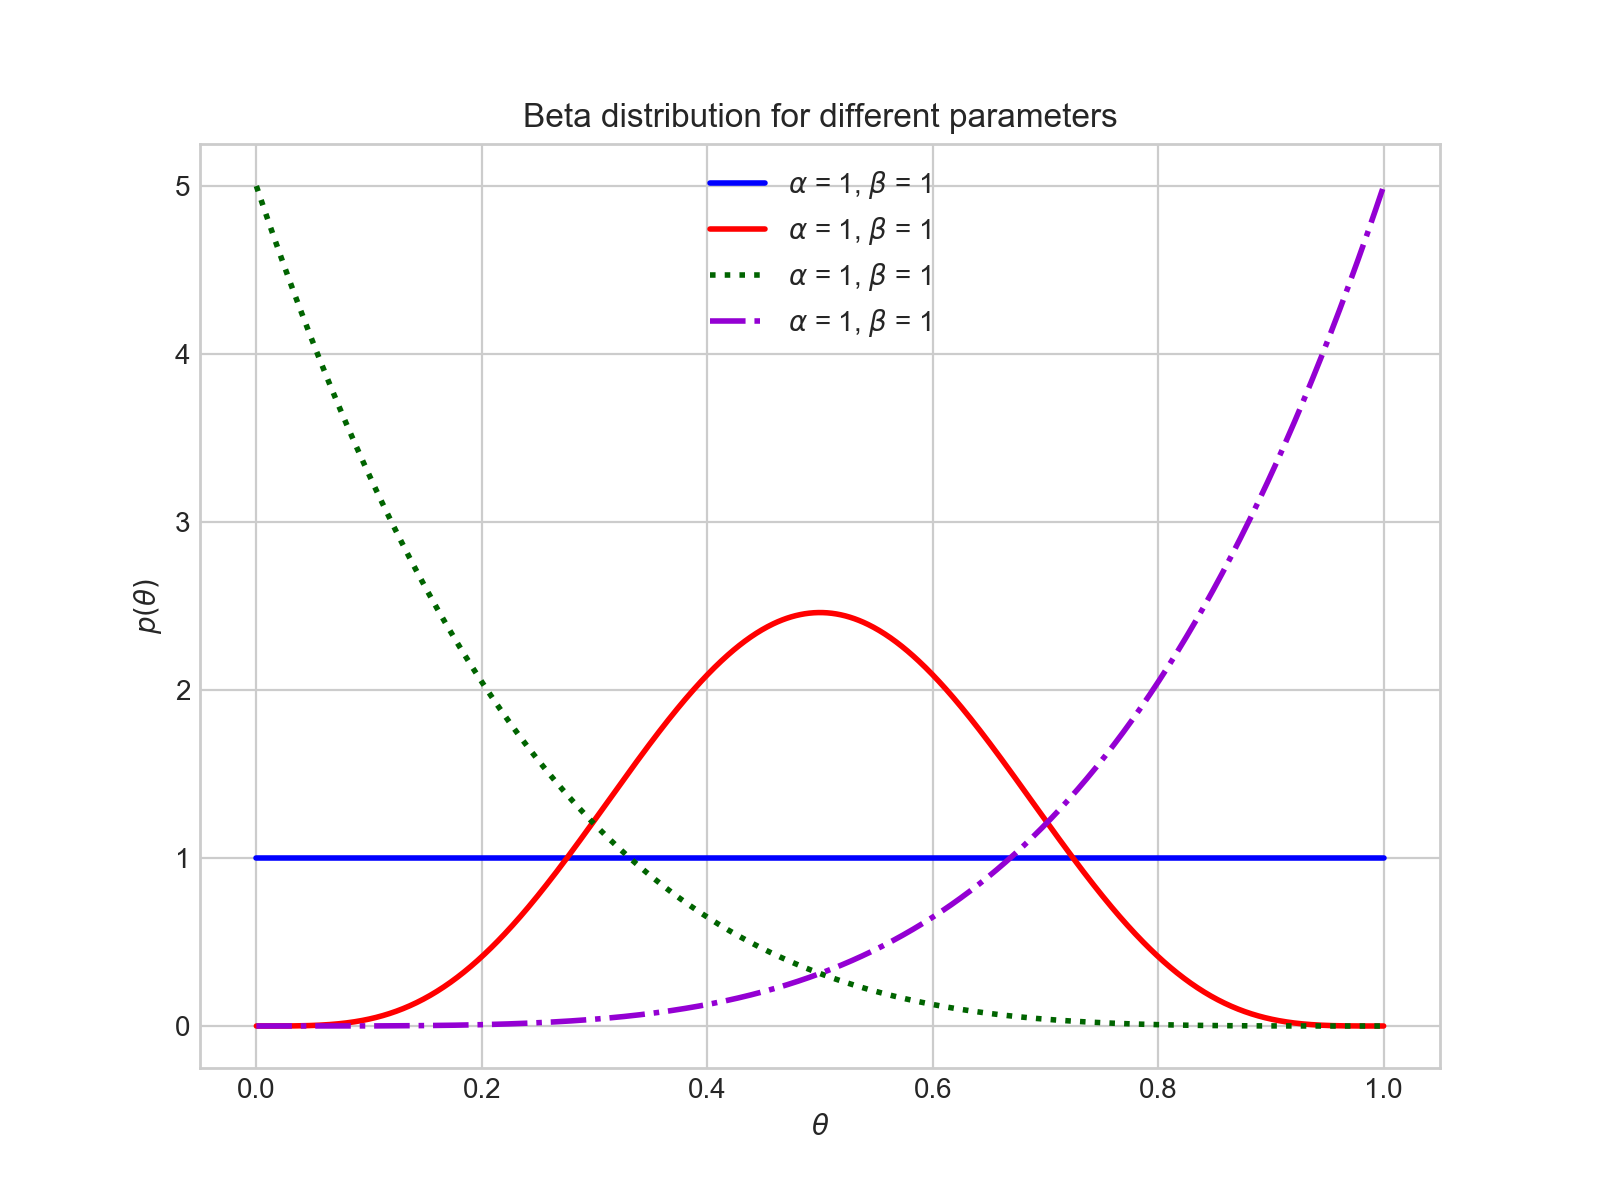

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

# grid for the x-axis
x = np.linspace(0, 1, 1000)

# create the probability density for the first
# set of parameters
curve1 = scipy.stats.beta(a1, b1).pdf(x)

# plot the curve
ax.plot(x, curve1, color="blue", lw=2, 
        label=r"$\alpha$ = %i, $\beta$ = %i"%(a1, b1))

# do the same with the other parameters
curve2 = scipy.stats.beta(a2, b2).pdf(x)
curve3 = scipy.stats.beta(a3, b3).pdf(x)
curve4 = scipy.stats.beta(a4, b4).pdf(x)

ax.plot(x, curve2, color="red", linestyle="-", lw=2, 
        label=r"$\alpha$ = %i, $\beta$ = %i"%(a1, b1))
ax.plot(x, curve3, color="darkgreen", linestyle=":", lw=2, 
        label=r"$\alpha$ = %i, $\beta$ = %i"%(a1, b1))
ax.plot(x, curve4, color="darkviolet", linestyle="-.", lw=2, 
        label=r"$\alpha$ = %i, $\beta$ = %i"%(a1, b1))

# set axis labels and title
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
ax.set_title("Beta distribution for different parameters")

ax.legend()


For reference, the mean and variance of the beta distribution are given by
\begin{equation}
E\left[\theta \right] = \frac{\alpha}{\alpha+\beta}
\end{equation}

\begin{equation}
Var\left[ \theta \right] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1}
\end{equation}

Let's create functions to calculate these quantities, which will be used later:

In [15]:
def mean_beta(a, b):
    return a/(a+b)

def var_beta(a, b):
    return a*b/((a + b)^2 * (a + b + 1))

### Now find $\alpha$ and $\beta$ values that make a beta distribution that looks like the one you sketched in class.
Change the values of "mya" and "myb" below to get the shape you want.

In [16]:
mya = 2
myb = 9

<IPython.core.display.Javascript object>


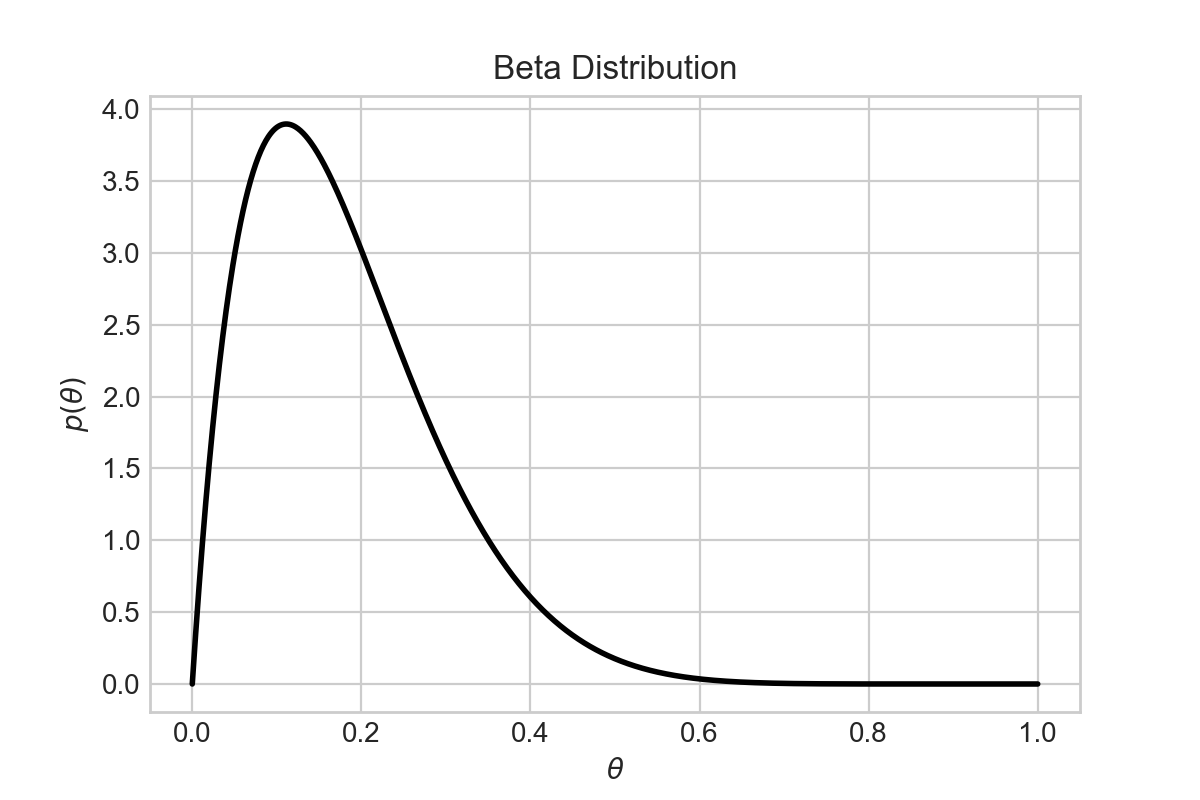

Text(0,0.5,'$p(\\theta)$')

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

my_pdf = scipy.stats.beta(mya, myb).pdf(x)
ax.plot(x, my_pdf, lw=2, color="black")
ax.set_title("Beta Distribution")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")


#### Calculate the mean and variance of your prior distribution

In [19]:
priormean = mean_beta(a = mya, b = myb)
priorvar = var_beta(a = mya, b = myb)
print(priormean,priorvar)

0.18181818181818182 0.9473684210526315


## 2. Product of likelihood and prior
Simplify the product of the likelihood (binomial distribution) and the prior (beta distribution), and identify the kernel of the posterior distribution, 
\begin{equation}
p(\theta|y) \propto \theta^{y + \alpha -1} (1 - \theta)^{n-y + \beta -1}.
\end{equation}

The above equation still has the form of a beta distribution, except now the parameters defining the distribution are $(y + \alpha)$ and $(n-y -\beta)$. Recall that the values of $n$ and $y$ come from the data. 


## 3. Open the m&m's bag and record the data

In [23]:
# total number of m&m's
ntotal = 21
# number of each colour (in case you want to look at the other colours at some point)
nblue = 6
norange = 7
ngreen = 3
nyellow = 4
nred = 0
nbrown = 1

## 3. Plot the posterior distribution give $n$, $y$, $\alpha$, and $\beta$

Next, we will plot the posterior distribution given the data and the prior, and the mean of the posterior distribution. Recall that the posterior distribution has the kernel of the beta distribution, but is parameterized slightly differently. We already wrote functions to calculate the mean of the beta distribution given $\alpha$ and $\beta$ values:

In [24]:
print(mean_beta)

<function mean_beta at 0x10c3f9730>


In [25]:
print(var_beta)

<function var_beta at 0x10c3f9ea0>


But now "a" and "b" are given by $y + \alpha$, and $n - y + \beta$ (If this is confusing, then look at the equation of the posterior distribution again, and compare it to the equation for the beta distribution). 

So to calculate the mean and variance, we do the following:

In [27]:
mean_posterior = mean_beta(a = (nblue + mya), b = (ntotal - nblue + myb) )
var_posterior = var_beta(a = (nblue + mya), b = (ntotal - nblue + myb) )
print(mean_posterior, var_posterior)

0.25 1.9591836734693877


We are ready to plot the posterior distribution, add a line showing the mean, and compare it to the prior distribution.

<IPython.core.display.Javascript object>


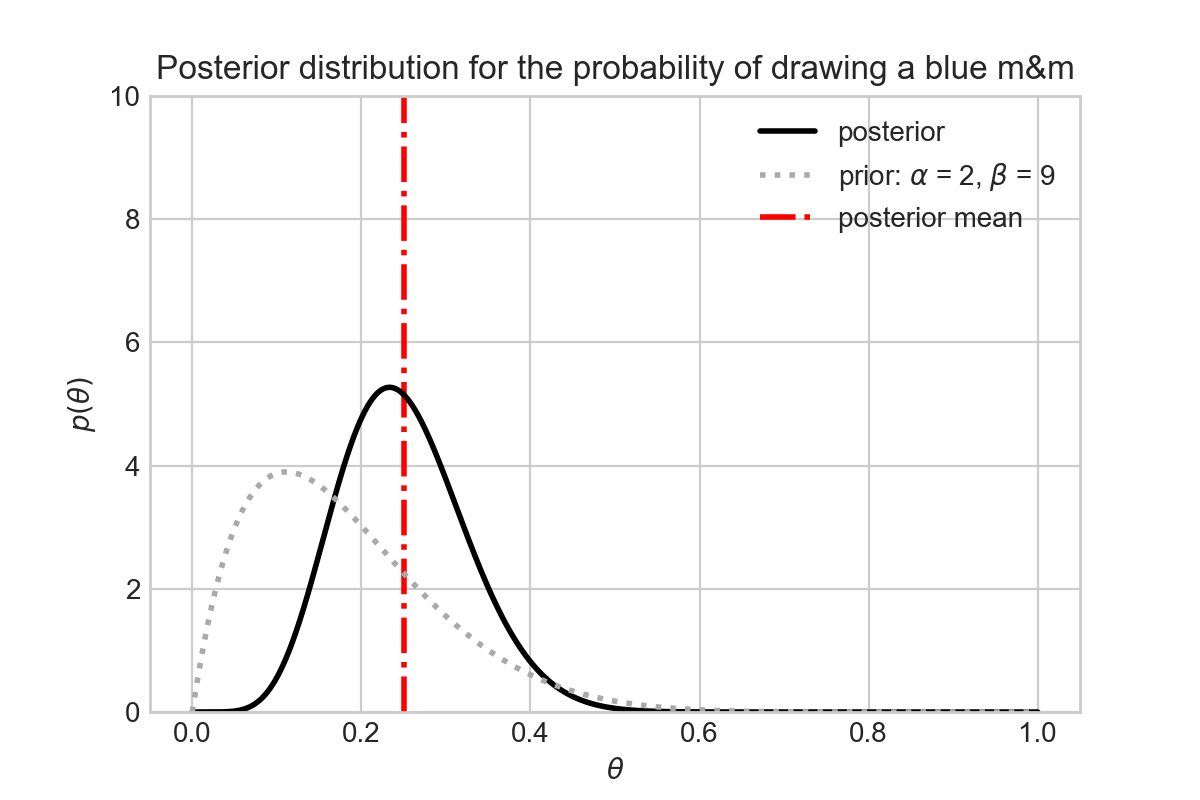

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# plot the posterior distribution
posterior_pdf = scipy.stats.beta((nblue + mya), (ntotal - nblue + myb)).pdf(x)
ax.plot(x, posterior_pdf, lw=2, color="black", label="posterior")

# add a line to show the mean of the posterior
ax.vlines(mean_posterior, 0, 10, lw=2, color="red", 
          linestyle="-.", label="posterior mean")

# add the prior distribution, to compare
prior_pdf = scipy.stats.beta(mya, myb).pdf(x)
ax.plot(x, prior_pdf, lw=2, color="darkgrey", linestyle=':',
        label=r"prior: $\alpha$ = %i, $\beta$ = %i"%(mya, myb))

ax.set_ylim(0,10)
ax.set_title("Posterior distribution for the probability of drawing a blue m&m")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")

ax.legend()